In [1]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

# Color Quantization using K-Means

The present and following cells where inspired by the scikit-learn [Color Quantization using K-Means](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#color-quantization-using-k-means) example.

This notebook performs a pixel-wise Vector Quantization (VQ) of an image, reducing the number of
colors required to show the image to an specified number of colors, while preserving
the overall appearance quality.

In the example below, pixels are represented in a 3D-space and K-means is used to
find a specified number of color clusters. In the image processing literature,
the codebook obtained from K-means (the cluster centers) is called the color palette.
Using a single byte, up to 256 colors can be addressed, whereas an RGB encoding
requires 3 bytes per pixel. The GIF file format, for example, uses such a
palette.

In [3]:
# Load the desired image
def load_img(path, show_img=False, **kwargs):
    # The image is converted to float values and divided by 255 for 2 reasons:
    # to accelerate the algorithm convergence and the visualization of the image
    # using plt.imshow
    img = np.array(imread(path), dtype=np.float64)/255

    if show_img:
        plt.figure(**kwargs)
        plt.imshow(img)
        plt.axis('off');

    return img

In [4]:
def color_compressor(img, num_colors=16, n_samples=None, seed=None):
    # Transform to a 2D numpy array.
    img_sample = img.reshape(-1, 3)

    # If n_samples is ppassed, the trainig process fits on a subsample of the image.
    if n_samples is not None:
        img_sample = shuffle(img_sample, random_state=seed, n_samples=n_samples)
    kmeans = KMeans(n_clusters=num_colors, random_state=seed).fit(img_sample)

    return kmeans

In [5]:
def color_compression(img, compressor):
    img_array = img.reshape(-1, 3)

    # # Get cluster labels for all pixels
    labels = compressor.predict(img_array)

    # Gets the pixel values for each centroid,
    colors = compressor.cluster_centers_

    # Apply the centroid values to each pixel in the image
    # and reshape to its original shape.
    compressed_array = colors[labels]
    compressed_img = compressed_array.reshape(img.shape)

    return compressed_img

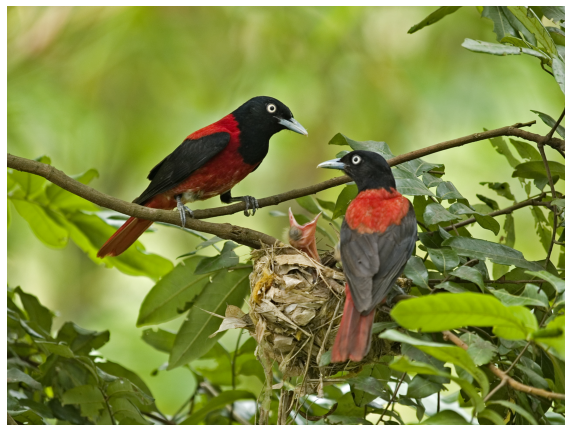

In [6]:
birds = load_img("birds.jpg", show_img=True, figsize=(10,10))
    

In [7]:
kmeans = color_compressor(birds, n_samples=1000, seed=1)
compressed_birds_16 = color_compression(birds, kmeans)

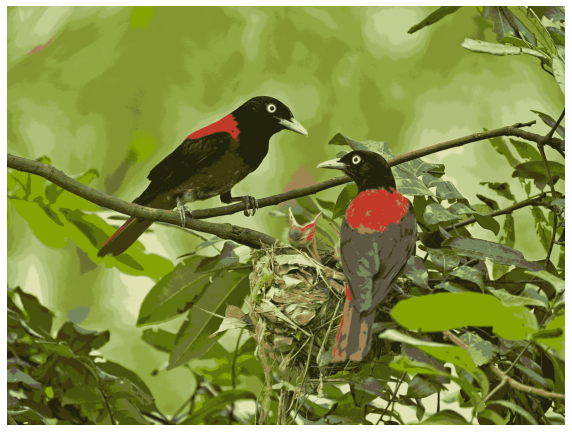

In [8]:
fig = plt.figure(figsize=(10,10))
plt.imshow(compressed_birds_16)
plt.axis('off');

In [17]:
kmeans = color_compressor(birds, num_colors=32, n_samples=1000, seed=1)
compressed_birds_32 = color_compression(birds, kmeans)

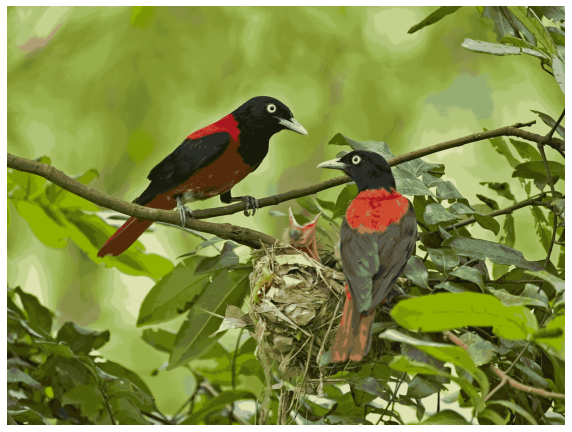

In [18]:
fig = plt.figure(figsize=(10,10))
plt.imshow(compressed_birds_32)
plt.axis('off');